In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vq_weights = np.load('../f4_vq_weights.npy')
print(vq_weights.shape)

(8192, 3)


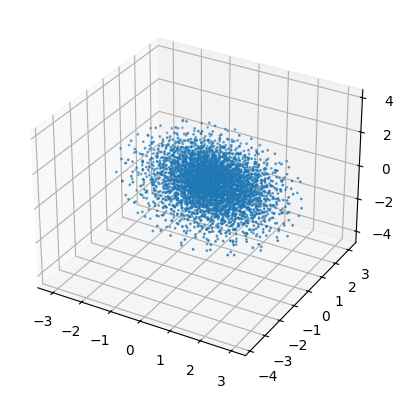

In [3]:
# here we plot the weights of the VQ-VAE given the 8192 vectors of 1*3

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vq_weights[:,0], vq_weights[:,1], vq_weights[:,2], s=1)
plt.show()

In [13]:
import plotly.graph_objects as go
import numpy as np

# Assuming vq_weights is defined
# Example:
# vq_weights = np.random.rand(100, 3)

def visualize_embeddings(vq_weights):
    fig = go.Figure(data=[go.Scatter3d(
    x=vq_weights[:, 0],
    y=vq_weights[:, 1],
    z=vq_weights[:, 2],
    mode='markers',
    marker=dict(size=2, opacity=0.3)
)])

    fig.update_layout(scene=dict(
    xaxis_title="X Axis",
    yaxis_title="Y Axis",
    zaxis_title="Z Axis"
))

    fig.show()

visualize_embeddings(vq_weights)


In [8]:
axial_pred = np.load('../axial_no_VQ_E4077.npy')
print(axial_pred.shape)
# transpose the data from 468, 3, 64, 64 to 64, 64, 468, 3
axial_pred = np.transpose(axial_pred, (2, 3, 0, 1))
print(axial_pred.shape)

(468, 3, 64, 64)
(64, 64, 468, 3)


In [10]:
axial_slice = axial_pred[:, :, 200, :].reshape(-1, 3)
print(axial_slice.shape)

(4096, 3)


In [11]:
import plotly.graph_objects as go
import numpy as np

# Assuming vq_weights is defined
# Example:
# vq_weights = np.random.rand(100, 3)

fig = go.Figure(data=[go.Scatter3d(
    x=axial_slice[:, 0],
    y=axial_slice[:, 1],
    z=axial_slice[:, 2],
    mode='markers',
    marker=dict(size=2, opacity=0.3)
)])

fig.update_layout(scene=dict(
    xaxis_title="X Axis",
    yaxis_title="Y Axis",
    zaxis_title="Z Axis"
))

fig.show()


In [14]:
import copy

normal_vq_weights = copy.deepcopy(vq_weights)
# normalize the weights by project it into the unit sphere
normal_vq_weights /= np.linalg.norm(normal_vq_weights, axis=1)[:, np.newaxis]
print(normal_vq_weights.shape)
visualize_embeddings(normal_vq_weights)

(8192, 3)


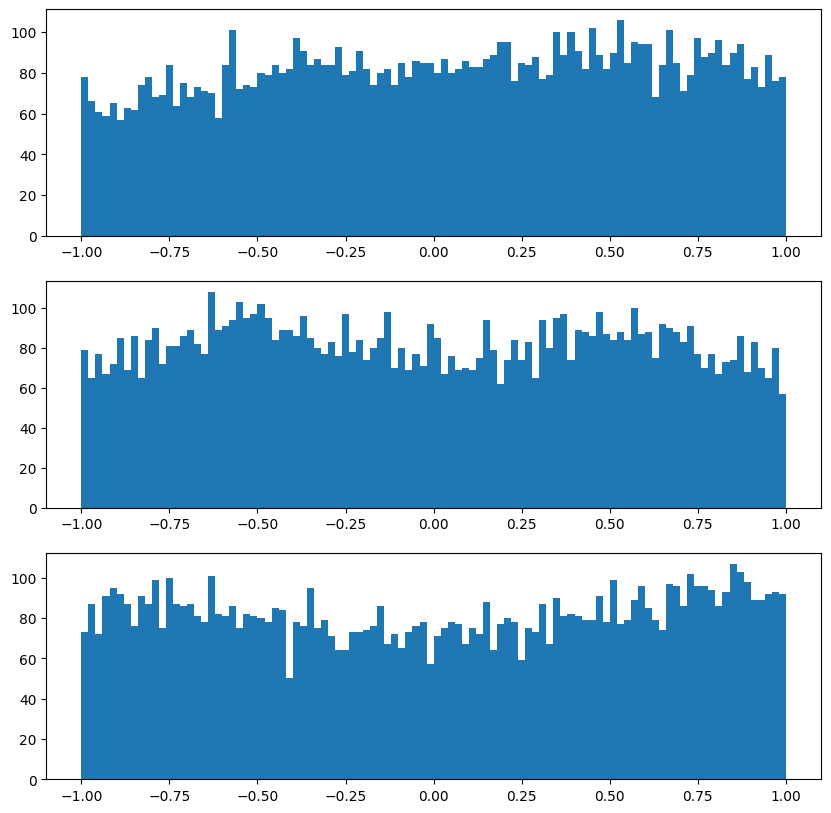

In [25]:
# plot the histogram of normal_vq_weights in 3 rows
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
    ax[i].hist(normal_vq_weights[:, i], bins=100)
plt.show()

In [15]:
normalized_axial_slice = copy.deepcopy(axial_slice)
# normalize the weights by project it into the unit sphere
normalized_axial_slice /= np.linalg.norm(normalized_axial_slice, axis=1)[:, np.newaxis]
print(normalized_axial_slice.shape)
visualize_embeddings(normalized_axial_slice)

(4096, 3)


In [22]:
norm_vector = normalized_axial_slice[0, :]
print(norm_vector)
# find the closest vector in the VQ-VAE weights
distances = np.linalg.norm(normal_vq_weights - norm_vector, axis=1)
print(distances)
min_index = np.argmin(distances)
print(min_index)
print(normal_vq_weights[min_index])
# find the closest vector in the VQ-VAE weights
print(vq_weights[min_index])

[ 0.3241457  -0.6864788   0.65090424]
[0.89879507 1.1294278  1.4714136  ... 0.99353534 0.7249013  1.857834  ]
6770
[ 0.32037646 -0.6843989   0.6549481 ]
[ 0.5562914 -1.1883683  1.1372309]
